In [1]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read Elnaz hydro
elnaz_niag_files = glob('../../data/hydro/hydrodata_elnaz_2030/RMN_*.csv')
elnaz_stl_files = glob('../../data/hydro/hydrodata_elnaz_2030/STL_*.csv')

df_elnaz_niag = pd.concat([pd.read_csv(file) for file in elnaz_niag_files])
df_elnaz_niag['TimeStamp'] = pd.to_datetime(df_elnaz_niag['TimeStamp'])
df_elnaz_niag.sort_values('TimeStamp', inplace=True)
df_elnaz_niag.dropna(inplace=True)
df_elnaz_niag.set_index('TimeStamp', inplace=True)

df_elnaz_stl = pd.concat([pd.read_csv(file) for file in elnaz_stl_files])
df_elnaz_stl['TimeStamp'] = pd.to_datetime(df_elnaz_stl['TimeStamp'])
df_elnaz_stl.sort_values('TimeStamp', inplace=True)
df_elnaz_stl.dropna(inplace=True)
df_elnaz_stl.set_index('TimeStamp', inplace=True)

In [3]:
# Read Vivienne hydro
df_stl = pd.read_csv('../../data/hydro/nypaMosesSaundersEnergy.climate.change.csv')
df_stl['datetime'] = pd.to_datetime(df_stl['Year'].astype(str) + '-' + df_stl['Month'].astype(str).str.zfill(2))

df_niag = pd.read_csv('../../data/hydro/nypaNiagaraEnergy.climate.change.csv')
df_niag['datetime'] = pd.to_datetime(df_niag['Year'].astype(str) + '-' + df_niag['Month'].astype(str).str.zfill(2))

In [13]:
# Read Bracken et al. 2025
df_gd = pd.read_csv('../../data/hydro/godeeep-hydro/godeeep-hydro-historical-monthly.csv')

# Niagara
df_gd_niagara = df_gd[df_gd['plant'] == 'Robert Moses Niagara'].copy()
df_gd_niagara['datetime'] = pd.to_datetime(df_gd_niagara['datetime'])

# STL
df_gd_stl = df_gd[df_gd['plant'] == 'Robert Moses - St. Lawrence'].copy()
df_gd_stl['datetime'] = pd.to_datetime(df_gd_stl['datetime'])

In [17]:
hourly_avg = disaggregate_weekly_to_hourly(df_gd_niagara, method='average')

In [19]:
hourly_diurnal = disaggregate_weekly_to_hourly(
    df_gd_niagara, 
    method='diurnal', 
    morning_peak_hour=7, 
    evening_peak_hour=19
)

In [26]:
weekly_totals = hourly_diurnal.groupby(['eia_id', 'week_start'])['power_mw'].sum()
print("Energy conservation check:")
print(weekly_totals.head())

Energy conservation check:
eia_id  week_start
2693    1982-01-01    700375.28986
        1982-02-01    905230.32240
        1982-03-01    981502.60718
        1982-04-01    931079.86147
        1982-05-01    909018.15555
Name: power_mw, dtype: float64


In [27]:
df_gd_niagara

,datetime,eia_id,plant,power_predicted_mwh,n_hours,p_avg,p_max,p_min,ador,scenario
204288,1982-01-01,2693,Robert Moses Niagara,7.003753e+05,744,941.36464,1624.96234,375.35167,557.45953,historical
204289,1982-02-01,2693,Robert Moses Niagara,9.052303e+05,672,1347.06893,1844.25007,537.11872,583.11987,historical
204290,1982-03-01,2693,Robert Moses Niagara,9.815026e+05,744,1319.22393,1829.19953,526.01605,581.35871,historical
204291,1982-04-01,2693,Robert Moses Niagara,9.310799e+05,720,1293.16647,1815.11518,515.62612,579.71060,historical
204292,1982-05-01,2693,Robert Moses Niagara,9.090182e+05,744,1221.79860,1776.54004,487.16950,575.19666,historical
...,...,...,...,...,...,...,...,...,...,...
204739,2019-08-01,2693,Robert Moses Niagara,1.446441e+06,744,1944.14157,2166.97453,775.19035,620.88406,historical
204740,2019-09-01,2693,Robert Moses Niagara,1.365989e+06,720,1897.20733,2141.60604,756.47619,617.91552,historical
204741,2019-10-01,2693,Robert Moses Niagara,1.411811e+06,744,1897.59587,2141.81606,756.63112,617.94009,historical
204742,2019-11-01,2693,Robert Moses Niagara,1.530992e+06,720,2126.37716,2265.47491,847.85341,632.41026,historical


<Axes: >

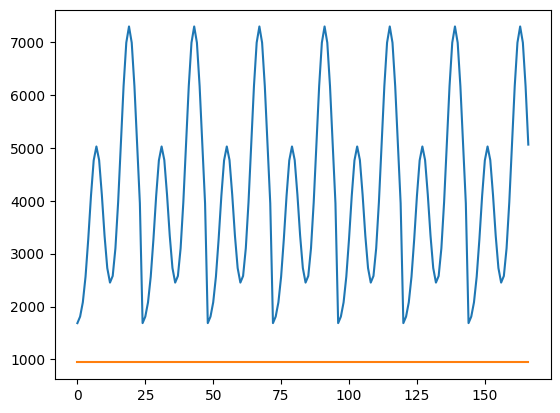

In [23]:
hourly_diurnal.iloc[:167]['power_mw'].plot()
hourly_avg.iloc[:167]['power_mw'].plot()

In [11]:
# Example usage:
# For average method:
# hourly_avg = disaggregate_weekly_to_hourly(df, method='average')

# For diurnal cycle with custom peak times:
# hourly_diurnal = disaggregate_weekly_to_hourly(
#     df, 
#     method='diurnal', 
#     morning_peak_hour=7, 
#     evening_peak_hour=19
# )

# Verify energy conservation (should sum to original total):
# weekly_totals = hourly_diurnal.groupby(['eia_id', 'week_start'])['power_mw'].sum()
# print("Energy conservation check:")
# print(weekly_totals.head())

,datetime,eia_id,plant,power_predicted_mwh,n_hours,p_avg,p_max,p_min,ador,scenario
204288,1982-01-01,2693,Robert Moses Niagara,7.003753e+05,744,941.36464,1624.96234,375.35167,557.45953,historical
204289,1982-02-01,2693,Robert Moses Niagara,9.052303e+05,672,1347.06893,1844.25007,537.11872,583.11987,historical
204290,1982-03-01,2693,Robert Moses Niagara,9.815026e+05,744,1319.22393,1829.19953,526.01605,581.35871,historical
204291,1982-04-01,2693,Robert Moses Niagara,9.310799e+05,720,1293.16647,1815.11518,515.62612,579.71060,historical
204292,1982-05-01,2693,Robert Moses Niagara,9.090182e+05,744,1221.79860,1776.54004,487.16950,575.19666,historical
...,...,...,...,...,...,...,...,...,...,...
204739,2019-08-01,2693,Robert Moses Niagara,1.446441e+06,744,1944.14157,2166.97453,775.19035,620.88406,historical
204740,2019-09-01,2693,Robert Moses Niagara,1.365989e+06,720,1897.20733,2141.60604,756.47619,617.91552,historical
204741,2019-10-01,2693,Robert Moses Niagara,1.411811e+06,744,1897.59587,2141.81606,756.63112,617.94009,historical
204742,2019-11-01,2693,Robert Moses Niagara,1.530992e+06,720,2126.37716,2265.47491,847.85341,632.41026,historical


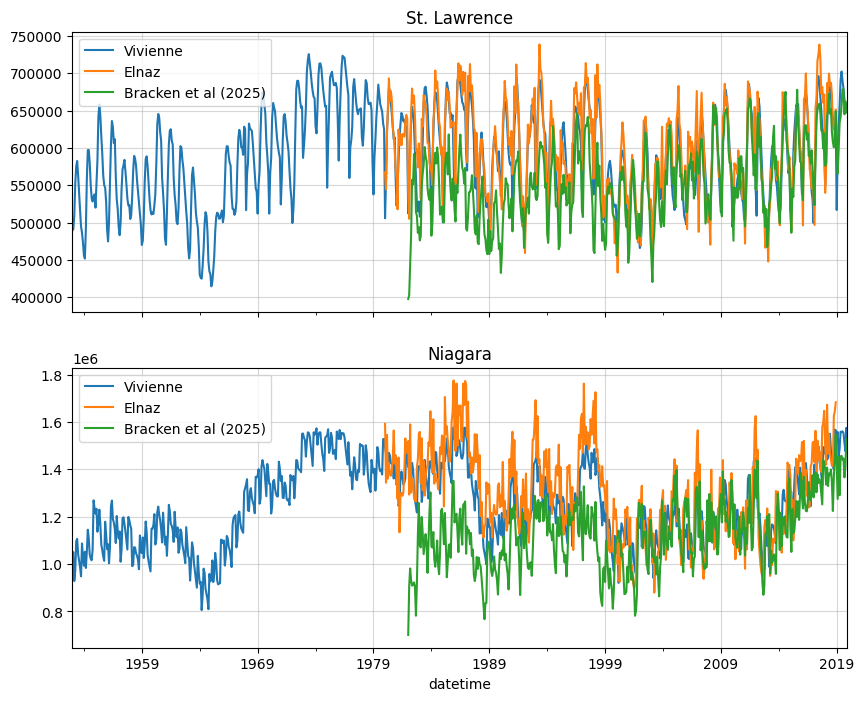

In [38]:
fig, axs = plt.subplots(2,1, figsize=(10,8), sharex=True)
# STL
ax = axs[0]
df_stl.set_index('datetime').resample('ME').sum()['nypaMosesSaundersEnergy'].plot(ax=ax, label='Vivienne')
df_elnaz_stl.resample('ME').sum()['HydroPower'].loc['1980':'2018'].plot(ax=ax, label='Elnaz')
df_gd_stl.set_index('datetime')['power_predicted_mwh'].plot(ax=ax, label='Bracken et al (2025)')
ax.legend()
ax.grid(alpha=0.5)
ax.set_title('St. Lawrence')

# Niagara
ax = axs[1]
df_niag.set_index('datetime').resample('ME').sum()['nypaNiagaraEnergy'].plot(ax=ax, label='Vivienne')
df_elnaz_niag.resample('ME').sum()['HydroPower'].loc['1980':'2018'].plot(ax=ax, label='Elnaz')
df_gd_niagara.set_index('datetime')['power_predicted_mwh'].plot(ax=ax, label='Bracken et al (2025)')
ax.legend()
ax.grid(alpha=0.5)
ax.set_title('Niagara')

plt.show()

In [187]:
df_test = pd.merge(df_niag.set_index('datetime').resample('ME').sum(),
                   df_elnaz_niag.resample('ME').sum(),
                   left_index=True, right_index=True,
                   how='inner')

df_test.apply(lambda x: np.mean((x - df_test['HydroPower'])**2), axis=0).iloc[3:-5].idxmin()

'nypaNiagaraEnergy.18'

In [171]:
# Read scenarios
df_scen = pd.read_csv('../../data/hydro/DU_factors_v3_300.csv', header=None)

In [205]:
# Wide to long
df_niag_long = (
    pd.wide_to_long(df_niag.drop(columns=['nypaNiagaraEnergy', 'datetime']), 
                    stubnames='nypaNiagaraEnergy.',
                    i=['Year', 'Month', 'QM'],
                    j='scenario')
    .rename(columns={'nypaNiagaraEnergy.':'nypaNiagaraEnergy'})
    .reset_index()
)

df_stl_long = (
    pd.wide_to_long(df_stl.drop(columns=['nypaMosesSaundersEnergy', 'datetime']), 
                    stubnames='nypaMosesSaundersEnergy.',
                    i=['Year', 'Month', 'QM'],
                    j='scenario')
    .rename(columns={'nypaMosesSaundersEnergy.':'nypaMosesSaundersEnergy'})
    .reset_index()
)

In [245]:
# Scenario to temperature delta mapping
mapping = {df_scen.iloc[i][6]:df_scen.iloc[i][0] for i in df_scen.drop_duplicates(subset=6).index}

df_stl_long['temperature_delta'] = df_stl_long['scenario'].apply(lambda x: mapping[int(x)] if x in mapping.keys() else np.nan)
df_niag_long['temperature_delta'] = df_niag_long['scenario'].apply(lambda x: mapping[int(x)] if x in mapping.keys() else np.nan)

In [249]:
df_stl_long.dropna()

,Year,Month,QM,scenario,nypaMosesSaundersEnergy,temperature_delta
0,1953,1,1,1,124469.589733,3.32
1,1953,1,1,2,124625.385317,2.43
2,1953,1,1,3,123117.474197,2.11
3,1953,1,1,4,124524.207468,0.95
4,1953,1,1,5,124001.172526,3.08
...,...,...,...,...,...,...
511328,2019,12,48,144,133679.854175,4.52
511333,2019,12,48,149,120020.595120,4.89
511335,2019,12,48,151,153309.513205,3.25
511336,2019,12,48,152,156499.885882,2.76


In [54]:
# Bracken CC scenarios
df_gd_cc = pd.concat([
    pd.read_csv('../../data/hydro/godeeep-hydro/godeeep-hydro-rcp45cooler-monthly.csv'),
    pd.read_csv('../../data/hydro/godeeep-hydro/godeeep-hydro-rcp45hotter-monthly.csv'),
    pd.read_csv('../../data/hydro/godeeep-hydro/godeeep-hydro-rcp85cooler-monthly.csv'),
    pd.read_csv('../../data/hydro/godeeep-hydro/godeeep-hydro-rcp85hotter-monthly.csv')
])
df_gd_cc['datetime'] = pd.to_datetime(df_gd_cc['datetime'])

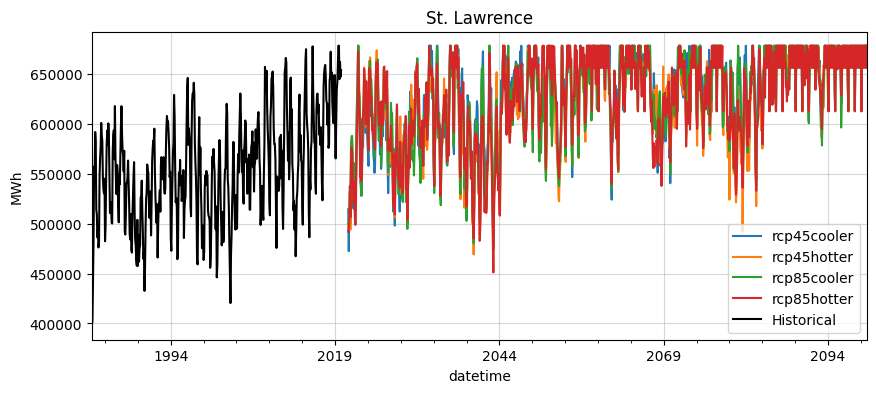

In [59]:
fig, ax = plt.subplots(figsize=(10,4))
df_gd_cc[df_gd_cc['plant'] == 'Robert Moses - St. Lawrence'].set_index('datetime').groupby('scenario')['power_predicted_mwh'].plot(ax=ax)
df_gd_stl.set_index('datetime')['power_predicted_mwh'].plot(ax=ax, label='Historical', color='black')
ax.grid(alpha=0.5)
ax.legend()
ax.set_title('St. Lawrence')
ax.set_ylabel('MWh')
plt.show()

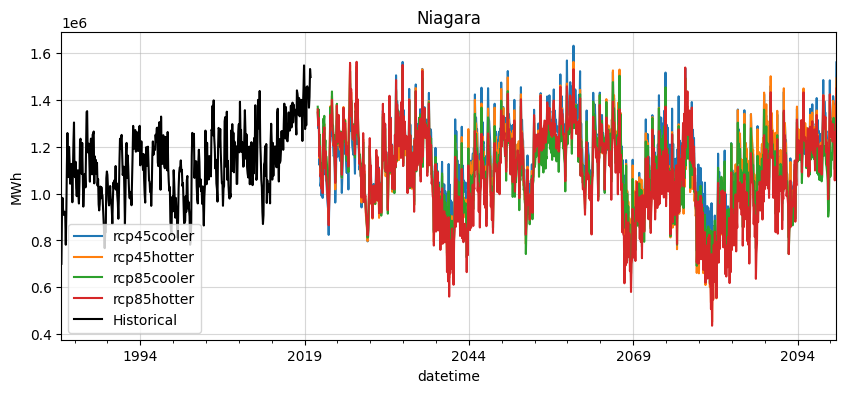

In [58]:
fig, ax = plt.subplots(figsize=(10,4))
df_gd_cc[df_gd_cc['plant'] == 'Robert Moses Niagara'].set_index('datetime').groupby('scenario')['power_predicted_mwh'].plot(ax=ax)
df_gd_niagara.set_index('datetime')['power_predicted_mwh'].plot(ax=ax, label='Historical', color='black')
ax.grid(alpha=0.5)
ax.legend()
ax.set_title('Niagara')
ax.set_ylabel('MWh')
plt.show()

In [66]:
# TGW warming deltas
df_deltas_rcp85hotter = pd.read_csv('/home/fs01/dcl257/data/TGW_WarmingDeltas/CONUS_Monthly_Delta_rcp85hotter.csv')
df_deltas_rcp45cooler = pd.read_csv('/home/fs01/dcl257/data/TGW_WarmingDeltas/CONUS_Monthly_Delta_rcp45cooler.csv')

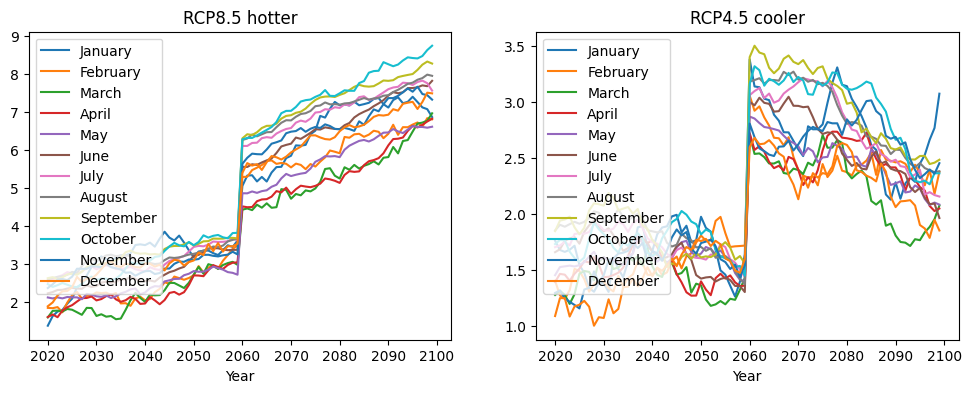

In [69]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
df_deltas_rcp85hotter.set_index('Year').plot(ax=axs[0])
axs[0].set_title('RCP8.5 hotter')
df_deltas_rcp45cooler.set_index('Year').plot(ax=axs[1])
axs[1].set_title('RCP4.5 cooler')
plt.show()